**Q.1**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

consider matrix1n*k
matrix2:k*m

no.of multiplications:n*k*m
no of addition:n*(k-1)*m

reason:as we have to do k times multiplication operation on each row of first matrix(n times) and col in 2nd matrix (m times)
no of mult=n*k*m
also same for addition we have to do (k-1) additions .
hence tot addition:n*(k-1)*m

**Q.2**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
import numpy as np
mat1 = [[1, 6, 5],[3 ,4, 8],[2, 12, 3]]
mat2 = [[3, 4, 6],[5, 6, 7],[6,56, 7]]
result = [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]
A=np.array([[1, 6, 5],[3 ,4, 8],[2, 12, 3]])
B=np.array([[3, 4, 6],[5, 6, 7],[6,56, 7]])
def mult_np(mat1,mat2):
  return np.dot(mat1,mat2)

def mult_ll(mat1,mat2):
  
  for i in range(len(A)):

 
    # iterating by column by B
    for j in range(len(B[0])):
 
        # iterating by rows of B
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
    return result 

%timeit mult_ll(mat1,mat2)
%timeit mult_np(A,B)



8.47 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.53 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


multiplication using numpy is faster than list of list approach.
An array is a collection of homogeneous data-types that are stored in contiguous memory locations. On the other hand, a list in Python is a collection of heterogeneous data types stored in non-contiguous memory locations.

**Q.3**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [9]:
from array import * 
import numpy as np

def med_given(b):
    a=b[:]
    length=len(a)
    a=list(b)
    if length%2!=0:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return max(a)
    else:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return (maxi+max(a))/2

#using array
def betterMedian(a):
 
    # First we sort the array
    sorted(a)
    n = len(a)
 
    # check for even case
    if n % 2 != 0:
        return float(a[int(n/2)])
 
    return float((a[int((n-1)/2)] +
                  a[int(n/2)])/2.0)
 
 


ab=[1, 3, 4, 2, 7, 5, 8, 6]
def med_nu(arr):
  return np.median(arr)

%timeit med_given(ab)
%timeit betterMedian(ab)
%timeit med_nu(ab)
print(med_given(ab),betterMedian(ab),med_nu(ab))


2.77 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
911 ns ± 14.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
28.9 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.5 4.5 4.5


$bettermedian() approach given will give time complexity O(nlogn) where as other two can give O(n^2) in worst case.$

**Q.4**What is the gradient of the following function with respect to x and y?


$grad f(x,y)=[(2xy+y^3cos(x ),(x^2 + 3y^2sin(x))]$

**Q.5**Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [11]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import grad
def pb(x,y):
    return x**2*y+y**3*jnp.sin(x)

# taking the gradient of paraboloid w.r.t. x 
grad_pb = grad(pb, argnums=(0,1),allow_int=True)
grad_pb(1.,1.)

(DeviceArray(2.5403023, dtype=float32, weak_type=True),
 DeviceArray(3.5244129, dtype=float32, weak_type=True))

**Q.6**Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
from sympy import *
x,y=symbols('x,y')
f=x**2*y+y**3*sin(x)
Gradient_1 = simplify(derive_by_array(f, (x, y)))
Gradient_1.subs({x:1,y:1})

**Q.7**

In [24]:
nest_dict={2022:
           {'Branch 1':
            {'Roll_number':22210023,'Name':'Madhuri','Marks':
             {'Maths':100,'English':70,'Algorithm':80}},
            'Branch 2':
            {'Roll_number':22210024,'Name':'Rani','Marks':
             {'Maths':90,'English':77,'Algorithm':50}}}, 
            2023:{'Branch 1':
            {'Roll_number':22210023,'Name':'Madhuri','Marks':
             {'Maths':100,'English':70,'Algorithm':80}},
            'Branch 2':
            {'Roll_number':22210024,'Name':'Rani','Marks':
             {'Maths':90,'English':77,'Algorithm':50}}},
           2024:{'Branch 1':
            {'Roll_number':22210023,'Name':'Madhuri','Marks':
             {'Maths':100,'English':70,'Algorithm':80}},
            'Branch 2':
            {'Roll_number':22210024,'Name':'Rani','Marks':
             {'Maths':90,'English':77,'Algorithm':50}}},
           2025:{'Branch 1':
            {'Roll_number':22210023,'Name':'Madhuri','Marks':
             {'Maths':100,'English':70,'Algorithm':80}},
            'Branch 2':
            {'Roll_number':22210024,'Name':'Rani','Marks':
             {'Maths':90,'English':77,'Algorithm':50}}}
          }

**Q.8**

In [23]:
class Marks():
    def __init__(self,marks):
        self.math,self.english,self.Algorithm=marks
class Students():
    def __init__(self,name,number,marks):
        self.name=name
        self.rollnumber=number
        self.marks=Marks(marks)
class Branches():
        def __init__(self,b):
            self.branch_name=b
            self.students=[]
            student_names=['Madhuri','Rani']
            student_rollno=[22210023,22210024]
            student_marks=[[100,70,80],[90,77,50]]
            for i in range(len(student_names)):
                self.students.append(Students(student_names[i],student_rollno[i],student_marks[i]))
class Year():
    def __init__(self,year):
        self.year=year
        self.branches=[]
        for i in range(2):
            self.branches.append(Branches('Branch '+str(i+1)))
years=[Year(2022),Year(2023),Year(2024),Year(2025)]

**Q.9**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

 
 


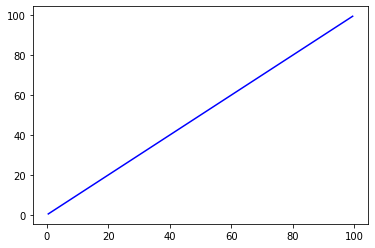

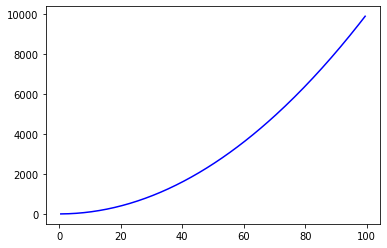

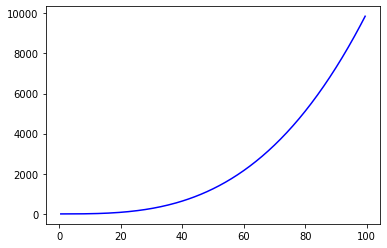

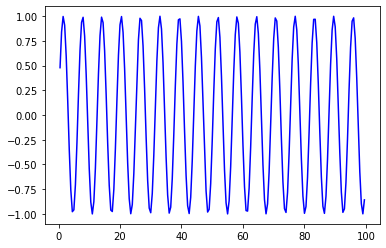

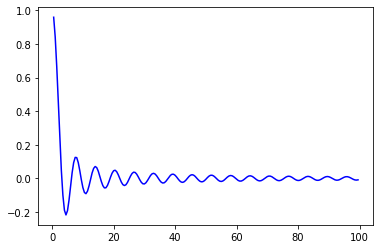

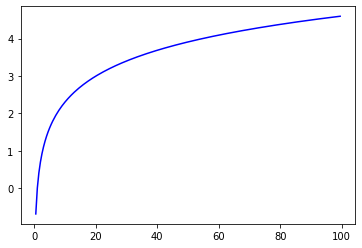

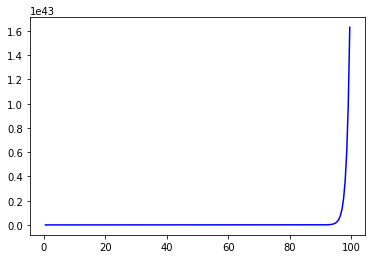

In [15]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0.5,100,0.5)
y=x
plt.plot(x, y,'b-') 
plt.show()
y1=x**2

plt.plot(x, y1,'b-') 
plt.show()
y2=(x**3)/100
plt.plot(x, y2,'b-') 
plt.show()
y3=np.sin(x)
plt.plot(x, y3,'b-') 
plt.show()
y4=np.sin(x)/x
plt.plot(x, y4,'b-') 
plt.show()
y5=np.log(x)
plt.plot(x, y5,'b-') 
plt.show()
y6=np.exp(x)
plt.plot(x, y6,'b-') 
plt.show()

**Q.10**Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [17]:
import numpy as np
import pandas as pd  
  
# numpy.random.uniform() method
random_array = np.random.uniform(1, 2,(20,5))
  

print("Array with random values : \n", random_array)
df = pd.DataFrame(random_array, columns=['a', 'b' ,'c', 'd', 'e'])

df_std=df.std()
max_std=max(df_std)
for ind,item in df_std.items():
    if item==max_std:
        column=ind
print('Max Standard Deviation column:',column,'and its value is:',max_std)
df_mean=df.mean(axis=1)
min_mean=min(df_mean)
for ind,item in df_mean.items():
    if item==min_mean:
        row=ind
print('row with the lowest mean:',row,'and its value is:',min_mean)

Array with random values : 
 [[1.0758123  1.71816522 1.70218699 1.91343903 1.19544841]
 [1.89604661 1.71089131 1.75088054 1.65137618 1.97340531]
 [1.21055746 1.88786635 1.90236366 1.83620789 1.6420295 ]
 [1.59055396 1.85442364 1.76470965 1.0914533  1.51342311]
 [1.79820106 1.20392551 1.36765544 1.35912839 1.85953907]
 [1.66573719 1.4654769  1.48429142 1.21133965 1.15295677]
 [1.86705711 1.39731869 1.4660255  1.61294005 1.21893032]
 [1.33401333 1.9553687  1.74246102 1.19675415 1.81261423]
 [1.34249461 1.59718368 1.53554605 1.18174595 1.93393449]
 [1.11731808 1.46498387 1.4094826  1.4183365  1.79043603]
 [1.74755871 1.60646733 1.54928676 1.84604803 1.36062186]
 [1.94514447 1.44560797 1.5327302  1.94232579 1.75779716]
 [1.21603697 1.02942809 1.97501558 1.62317605 1.49337953]
 [1.41059172 1.01911724 1.45266916 1.7593176  1.61075369]
 [1.1135214  1.32976876 1.23010404 1.12844934 1.43062784]
 [1.67571579 1.95477054 1.81293747 1.76084326 1.87391414]
 [1.10834983 1.53968536 1.90827693 1.296760

**Q.11**Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [18]:
import numpy as np
np.random.seed(42)
import pandas as pd  
  
# numpy.random.uniform() method
random_array = np.random.uniform(1, 2,(20,5))
  
# printing 1D array with random numbers
print("1D Array with random values : \n", random_array)
df = pd.DataFrame(random_array, columns=['a', 'b' ,'c', 'd', 'e'])

df_std=df.std()
max_std=max(df_std)
for ind,item in df_std.items():
    if item==max_std:
        column=ind
print('Max Standard Deviation column:',column,'and its value is:',max_std)
df_mean=df.mean(axis=1)
min_mean=min(df_mean)
for ind,item in df_mean.items():
    if item==min_mean:
        row=ind
print('row:',row,'and its value is:',min_mean)

df['f'] =  df[['a', 'b' ,'c', 'd', 'e']].sum(axis=1)
#print(df)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print('count of LT8',df['g'].value_counts()['LT8'])
LT8=df.loc[df['g']=='LT8']
GT8=df.loc[df['g']=='GT8']
print('std dev of LT8 f column:',LT8['f'].std())
print('std dev of GT8 f column:',GT8['f'].std())

1D Array with random values : 
 [[1.37454012 1.95071431 1.73199394 1.59865848 1.15601864]
 [1.15599452 1.05808361 1.86617615 1.60111501 1.70807258]
 [1.02058449 1.96990985 1.83244264 1.21233911 1.18182497]
 [1.18340451 1.30424224 1.52475643 1.43194502 1.29122914]
 [1.61185289 1.13949386 1.29214465 1.36636184 1.45606998]
 [1.78517596 1.19967378 1.51423444 1.59241457 1.04645041]
 [1.60754485 1.17052412 1.06505159 1.94888554 1.96563203]
 [1.80839735 1.30461377 1.09767211 1.68423303 1.44015249]
 [1.12203823 1.49517691 1.03438852 1.9093204  1.25877998]
 [1.66252228 1.31171108 1.52006802 1.54671028 1.18485446]
 [1.96958463 1.77513282 1.93949894 1.89482735 1.59789998]
 [1.92187424 1.0884925  1.19598286 1.04522729 1.32533033]
 [1.38867729 1.27134903 1.82873751 1.35675333 1.28093451]
 [1.54269608 1.14092422 1.80219698 1.07455064 1.98688694]
 [1.77224477 1.19871568 1.00552212 1.81546143 1.70685734]
 [1.72900717 1.77127035 1.07404465 1.35846573 1.11586906]
 [1.86310343 1.62329813 1.33089802 1.063

**Q.12**Write a small piece of code to explain broadcasting in numpy.

In [19]:
import numpy as np
a = np.array([17, 11, 19]) # 1x3 Dimension array
print(a)
b = 3 
print(b)
 
# Broadcasting happened because of
# miss match in array Dimension.
c = a + b
print(c)

[17 11 19]
3
[20 14 22]


**Q.13**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [21]:
import numpy as np
arr=np.array([-1, 2, 3, 4])


def findmin(arr):
  #index=-1
  index=0
  min_ele=arr[0]
  for i in range(1, len(arr)):
   
    if arr[i] < min_ele:
        min_ele = arr[i]
        index=i
  print(index)
  return index
ans=findmin(arr)


print(np.argmin(arr))
print('findmin():',ans,'numpy:',np.argmin(arr))

0
0
findmin(): 0 numpy: 0
